In [13]:
# Step 2: Data Exploration
import pandas as pd

# Load the datasets 
production_data = pd.read_csv(r'E:\wine\New Data Wine Production.csv')
consumption_data = pd.read_csv(r'E:\wine\New Data Wine Consumption.csv')

# Inspect the first few rows of each dataset
print("Production Data - Head:")
print(production_data.head(), "\n")

print("Consumption Data - Head:")
print(consumption_data.head(), "\n")

# Get basic information about the datasets
print("Production Data - Info:")
print(production_data.info(), "\n")

print("Consumption Data - Info:")
print(consumption_data.info(), "\n")

# Check for missing values
print("Missing Values in Production Data:")
print(production_data.isnull().sum(), "\n")

print("Missing Values in Consumption Data:")
print(consumption_data.isnull().sum(), "\n")

# Check for duplicate rows
print("Duplicate Rows in Production Data:")
print(production_data.duplicated().sum(), "\n")

print("Duplicate Rows in Consumption Data:")
print(consumption_data.duplicated().sum(), "\n")

# Get summary statistics
print("Summary Statistics for Production Data:")
print(production_data.describe(), "\n")

print("Summary Statistics for Consumption Data:")
print(consumption_data.describe(), "\n")

# Check unique values in key columns
print("Unique Areas in Production Data:")
print(production_data['Area'].unique(), "\n")

print("Unique Areas in Consumption Data:")
print(consumption_data['Area'].unique(), "\n")

print("Years Covered in Production Data:")
print(production_data['Year'].unique(), "\n")

print("Years Covered in Consumption Data:")
print(consumption_data['Year'].unique(), "\n")


Production Data - Head:
                         Domain            Area     Element  Item  Year  \
0  Crops and livestock products  Eastern Africa  Production  Wine  2018   
1  Crops and livestock products  Eastern Africa  Production  Wine  2019   
2  Crops and livestock products  Eastern Africa  Production  Wine  2020   
3  Crops and livestock products  Eastern Africa  Production  Wine  2021   
4  Crops and livestock products  Eastern Africa  Production  Wine  2022   

      Value  
0   4326.04  
1   4960.64  
2  11194.42  
3  10956.61  
4       NaN   

Consumption Data - Head:
                  Domain            Area                              Element  \
0  Food Balances (2010-)  Eastern Africa  Food supply quantity (kg/capita/yr)   
1  Food Balances (2010-)  Eastern Africa  Food supply quantity (kg/capita/yr)   
2  Food Balances (2010-)  Eastern Africa  Food supply quantity (kg/capita/yr)   
3  Food Balances (2010-)  Eastern Africa  Food supply quantity (kg/capita/yr)   
4  Food B

In [14]:
# Step 3: Data Cleaning

# Handling missing values in Production Data
print("Handling Missing Values in Production Data...")

# Option 1: Fill missing values with the mean of the column
production_data['Value'] = production_data['Value'].fillna(production_data['Value'].mean())

# Option 2: Drop rows with missing values 
# production_data = production_data.dropna()

# Verify missing values are handled
print("Missing Values in Production Data after cleaning:")
print(production_data.isnull().sum(), "\n")

# Check for any outliers or unrealistic values in 'Value' column
print("Checking for outliers in Production Data...")
print(production_data.describe())  # Analyze summary statistics

# Checking for any inconsistent data (if needed)
print("Unique Elements in Production Data:")
print(production_data['Element'].unique(), "\n")

print("Unique Elements in Consumption Data:")
print(consumption_data['Element'].unique(), "\n")

# Ensure both datasets have consistent year ranges
print("Ensuring year range consistency...")
print("Years in Production Data:", production_data['Year'].unique())
print("Years in Consumption Data:", consumption_data['Year'].unique())

# Merge the datasets for analysis
print("Merging Production and Consumption Data...")

# Ensure both datasets have the same structure before merging
merged_data = pd.merge(production_data, 
                       consumption_data, 
                       on=['Area', 'Year', 'Item'], 
                       suffixes=('_Production', '_Consumption'))

# Check the merged data
print("Merged Data - Head:")
print(merged_data.head(), "\n")

# Save the cleaned and merged data to a new CSV file (optional)
merged_data.to_csv(r'E:\wine\Merged_Wine_Data.csv', index=False)
print("Cleaned and Merged Data saved to 'Merged_Wine_Data.csv'")


Handling Missing Values in Production Data...
Missing Values in Production Data after cleaning:
Domain     0
Area       0
Element    0
Item       0
Year       0
Value      0
dtype: int64 

Checking for outliers in Production Data...
              Year         Value
count   110.000000  1.100000e+02
mean   2020.000000  1.779580e+06
std       1.420686  1.990384e+06
min    2018.000000  4.326040e+03
25%    2019.000000  2.623955e+05
50%    2020.000000  1.779580e+06
75%    2021.000000  1.779580e+06
max    2022.000000  1.103770e+07
Unique Elements in Production Data:
['Production'] 

Unique Elements in Consumption Data:
['Food supply quantity (kg/capita/yr)'] 

Ensuring year range consistency...
Years in Production Data: [2018 2019 2020 2021 2022]
Years in Consumption Data: [2018 2019 2020 2021 2022]
Merging Production and Consumption Data...
Merged Data - Head:
              Domain_Production            Area Element_Production  Item  \
0  Crops and livestock products  Eastern Africa         P

Total Production and Consumption by Region:
                         Area  Value_Production  Value_Consumption
0   Australia and New Zealand      8.045080e+06             103.20
1                   Caribbean      5.347738e+06               6.32
2             Central America      1.937748e+06               1.46
3                Central Asia      2.244913e+06               7.86
4              Eastern Africa      1.811018e+06               0.46
5                Eastern Asia      1.018401e+07               8.86
6              Eastern Europe      8.083348e+06              39.69
7                   Melanesia      8.897902e+06               3.58
8                  Micronesia      8.897902e+06               1.40
9               Middle Africa      8.897902e+06               1.96
10            Northern Africa      2.120243e+06               1.77
11           Northern America      1.112845e+07              44.59
12            Northern Europe      1.813243e+06              98.64
13                

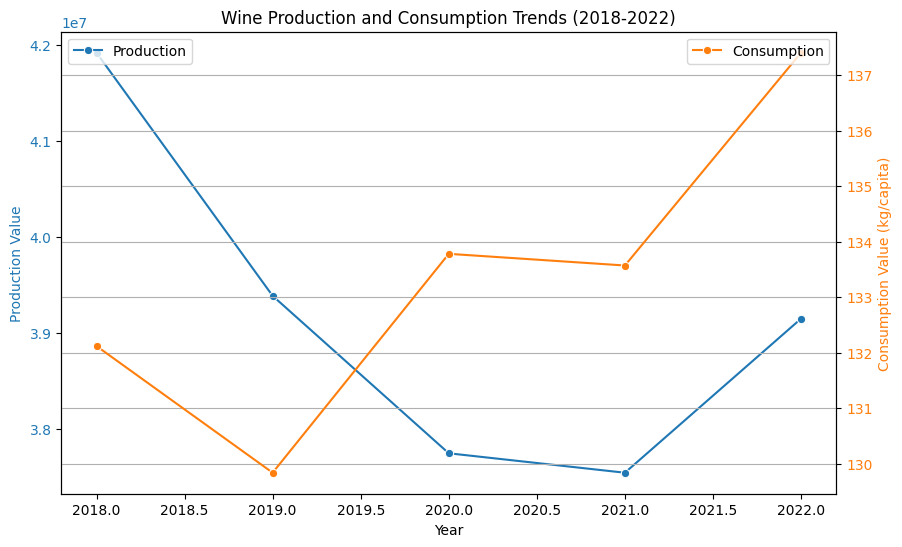

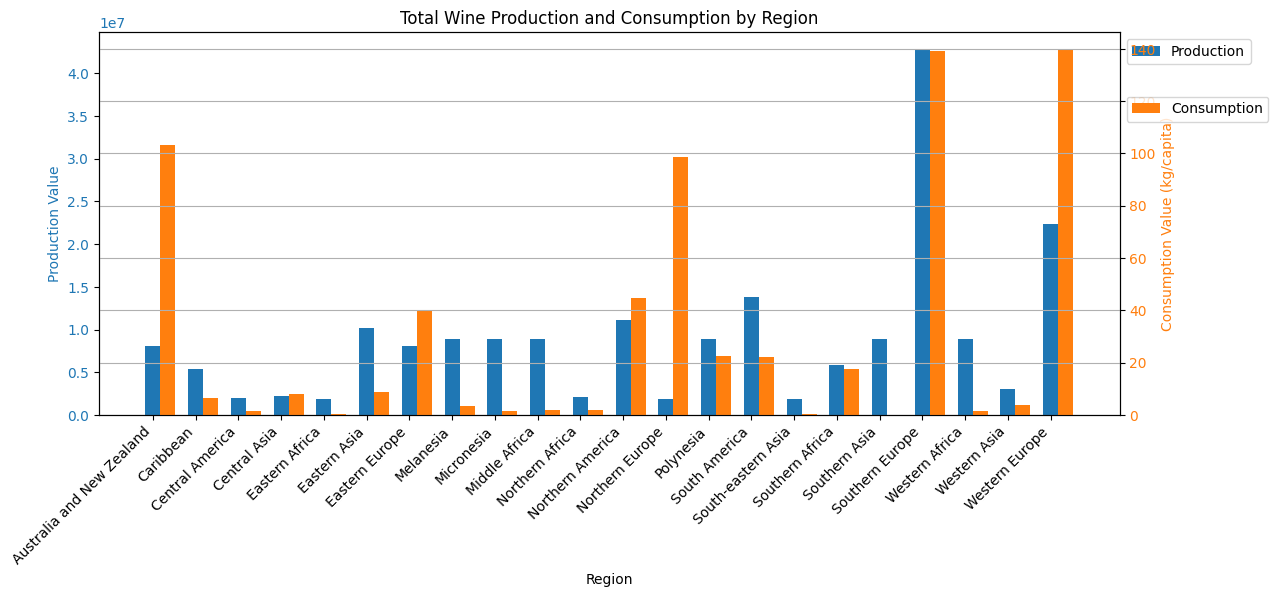

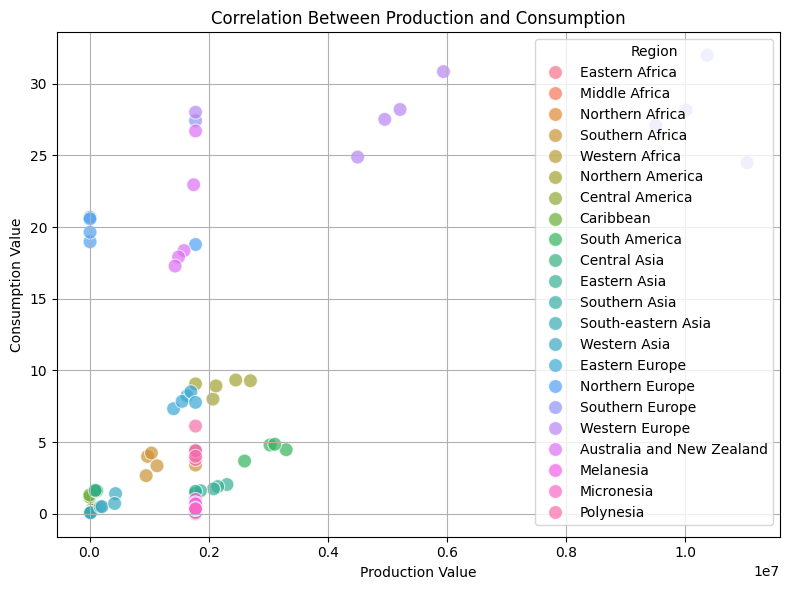

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 4: Data Analysis and Visualization (Updated for Non-overlapping Dual Bar Plot)

# 1. Key Metrics Analysis
# Total production and consumption by region
region_summary = merged_data.groupby('Area')[['Value_Production', 'Value_Consumption']].sum().reset_index()
print("Total Production and Consumption by Region:")
print(region_summary, "\n")

# 2. Trend Analysis
# Total production and consumption by year
year_summary = merged_data.groupby('Year')[['Value_Production', 'Value_Consumption']].sum().reset_index()
print("Total Production and Consumption by Year:")
print(year_summary, "\n")

# 3. Correlation Analysis
# Correlation between production and consumption
correlation = merged_data['Value_Production'].corr(merged_data['Value_Consumption'])
print(f"Correlation between Production and Consumption: {correlation:.2f}\n")

# 4. Visualizations

# a) Production and Consumption by Year (Dual Y-Axis)
plt.figure(figsize=(10, 6))

# Create first axis for production
ax1 = plt.gca()
sns.lineplot(data=year_summary, x='Year', y='Value_Production', label='Production', marker='o', ax=ax1, color='tab:blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Production Value', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('Wine Production and Consumption Trends (2018-2022)')

# Create second axis for consumption
ax2 = ax1.twinx()  # Create a second y-axis
sns.lineplot(data=year_summary, x='Year', y='Value_Consumption', label='Consumption', marker='o', ax=ax2, color='tab:orange')
ax2.set_ylabel('Consumption Value (kg/capita)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid()
plt.show()

# b) Production and Consumption by Region (Non-overlapping Dual Bar Plot)

# Set the width of the bars
bar_width = 0.35

# Set positions for the bars (production and consumption)
index = np.arange(len(region_summary))  # positions for the regions
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot production bars (blue) on the first axis
ax1.bar(index, region_summary['Value_Production'], bar_width, label='Production', color='tab:blue')
ax1.set_xlabel('Region')
ax1.set_ylabel('Production Value', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(index)
ax1.set_xticklabels(region_summary['Area'], rotation=45, ha='right')

# Create second axis for consumption bars (orange)
ax2 = ax1.twinx()
ax2.bar(index + bar_width, region_summary['Value_Consumption'], bar_width, label='Consumption', color='tab:orange')
ax2.set_ylabel('Consumption Value (kg/capita)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add the legend and adjust layout
fig.tight_layout()
plt.title('Total Wine Production and Consumption by Region')
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(1, 0.85))
plt.grid(axis='y')
plt.show()

# c) Scatter plot to visualize correlation between production and consumption
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x='Value_Production', y='Value_Consumption', hue='Area', s=100, alpha=0.7)
plt.title('Correlation Between Production and Consumption')
plt.xlabel('Production Value')
plt.ylabel('Consumption Value')
plt.grid()
plt.legend(title='Region')
plt.tight_layout()
plt.show()


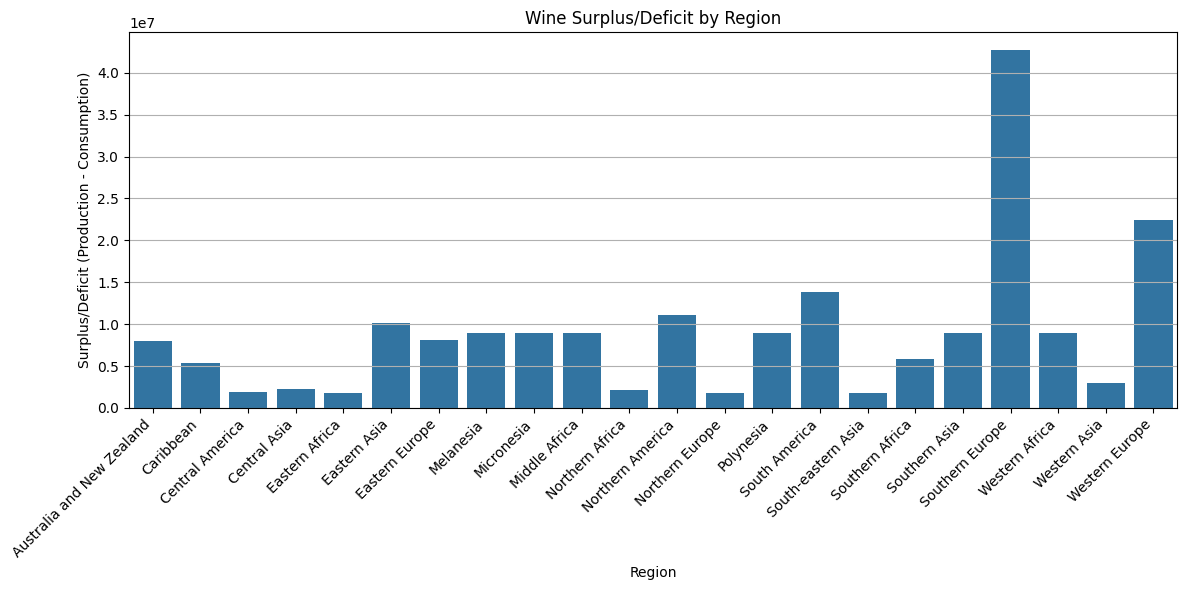

In [17]:
# Calculate Surplus/Deficit (Production - Consumption)
region_summary['Surplus/Deficit'] = region_summary['Value_Production'] - region_summary['Value_Consumption']

# Visualize Surplus/Deficit
plt.figure(figsize=(12, 6))
sns.barplot(data=region_summary, x='Area', y='Surplus/Deficit')
plt.xlabel('Region')
plt.ylabel('Surplus/Deficit (Production - Consumption)')
plt.xticks(rotation=45, ha='right')
plt.title('Wine Surplus/Deficit by Region')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
